In [3]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Ministerio del Agro/Bases/caracterizacion.xlsx')
df = df.set_index('Microrregion')
df

,Pob,1-PI,1-PC,1-SI,1-SC,1-SUPI,1-SUPC,1-UI,1-UC,2-I,2-PI,2-PC,2-SI,2-SC,Analf,PC,CEL,Cloaca,Camara/Pozo,Pozo Ciego,Excavación,Red Eléctrica,Generador,Otro,Sin Luz,29anios,65anios,Obrero,Cuentapropista,TrabFliar,Patrón,CaracterOcup,SectorTrabajo,SectorPublico
Microrregion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AltoParana,0,0.3810,0.1713,0.2098,0.1077,0.0216,0.0253,0.0233,0.0217,0.0227,0.6024,0.0282,0.2826,0.0140,0.0300,1,0,0.0804,0.5396,0.2150,0.1651,0.9497,0.0015,0.0112,0.0376,0.4166,0.0352,0.6791,0.2138,0.0612,0.0459,1,1,1
AltoUruguay,1,0.5509,0.2064,0.1273,0.0406,0.0074,0.0187,0.0072,0.0079,0.0212,0.6800,0.0585,0.1902,0.0040,0.0410,1,0,0.0076,0.2558,0.3050,0.4316,0.8871,0.0023,0.0035,0.1072,0.6268,0.0470,0.3583,0.3514,0.2340,0.0538,1,1,1
Centro,0,0.4180,0.2075,0.1665,0.0769,0.0172,0.0344,0.0214,0.0191,0.0238,0.6094,0.0426,0.2592,0.0142,0.0305,1,0,0.0914,0.3997,0.2484,0.2605,0.9291,0.0019,0.0033,0.0657,0.4952,0.0585,0.5628,0.2445,0.1348,0.0580,1,1,1
Nordeste,1,0.5548,0.1712,0.1390,0.0477,0.0097,0.0192,0.0088,0.0074,0.0264,0.6825,0.0443,0.1911,0.0097,0.0485,1,0,0.0142,0.2856,0.2918,0.4084,0.8063,0.0035,0.0069,0.1832,0.6621,0.0347,0.4178,0.3265,0.2192,0.0366,1,1,1
Oeste,0,0.4049,0.1925,0.1966,0.0872,0.0182,0.0313,0.0165,0.0167,0.0231,0.6014,0.0290,0.2855,0.0138,0.0311,1,0,0.1054,0.4844,0.2065,0.2038,0.7196,0.0025,0.0055,0.0576,0.5929,0.0683,0.6547,0.2136,0.0673,0.0644,1,1,1
Sur,0,0.3843,0.1916,0.1858,0.0998,0.0192,0.0329,0.0274,0.0192,0.0232,0.5960,0.0376,0.2779,0.0169,0.0295,1,0,0.1144,0.4700,0.2388,0.1769,0.9293,0.0013,0.0039,0.0654,0.5104,0.0575,0.5887,0.2651,0.1150,0.0328,1,1,1


# **Calculamos distancias**

In [5]:
# Escalado de las variables
# ==============================================================================
datos_scaled = scale(X=df, axis=0, with_mean=True, with_std=True) 
datos_scaled = pd.DataFrame(datos_scaled, columns=df.columns, index=df.index)
datos_scaled.head(4)

,Pob,1-PI,1-PC,1-SI,1-SC,1-SUPI,1-SUPC,1-UI,1-UC,2-I,2-PI,2-PC,2-SI,2-SC,Analf,PC,CEL,Cloaca,Camara/Pozo,Pozo Ciego,Excavación,Red Eléctrica,Generador,Otro,Sin Luz,29anios,65anios,Obrero,Cuentapropista,TrabFliar,Patrón,CaracterOcup,SectorTrabajo,SectorPublico
Microrregion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AltoParana,-0.707107,-0.912642,-1.282451,1.306947,1.242150,1.170426,-0.263154,0.791525,1.132181,-0.448435,-0.700468,-1.151627,0.845198,0.453496,-0.710783,0.0,0.0,0.271173,1.283181,-0.982854,-1.016878,0.969866,-0.916698,1.989705,-1.008622,-1.589789,-1.207898,1.150491,-1.045161,-1.148399,-0.237490,0.0,0.0,0.0
AltoUruguay,1.414214,1.368181,1.114037,-1.460114,-1.442174,-1.576689,-1.305245,-1.380672,-1.321866,-1.409369,1.372881,1.797186,-1.395729,-1.933327,0.822278,0.0,0.0,-1.445472,-1.439561,1.479982,1.462896,0.206333,0.183340,-0.804349,0.438305,0.902804,-0.257685,-1.572658,1.553107,1.416020,0.461704,0.0,0.0,0.0
Centro,-0.707107,-0.415936,1.189140,-0.145341,0.010001,0.319207,1.173668,0.535179,0.669824,0.256249,-0.513439,0.249789,0.277691,0.501233,-0.641098,0.0,0.0,0.530557,-0.059002,-0.068868,-0.129184,0.718608,-0.366679,-0.876922,-0.424446,-0.657735,0.668370,0.163264,-0.465460,-0.056146,0.833427,0.0,0.0,0.0
Nordeste,1.414214,1.420536,-1.289278,-1.067694,-1.158140,-1.131734,-1.226299,-1.164801,-1.410781,1.921866,1.439677,0.415234,-1.373901,-0.572838,1.867547,0.0,0.0,-1.289842,-1.153664,1.118766,1.247021,-0.779186,1.833397,0.429389,2.018284,1.321398,-1.248161,-1.067585,1.082926,1.196383,-1.060591,0.0,0.0,0.0


In [6]:
# Cálculo de distancias
# ==============================================================================
print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias

------------------
Distancia euclídea
------------------


Microrregion,AltoParana,AltoUruguay,Centro,Nordeste,Oeste,Sur
Microrregion,,,,,,
AltoParana,NaN,NaN,NaN,NaN,NaN,NaN
AltoUruguay,11.801845,NaN,NaN,NaN,NaN,NaN
Centro,6.027626,8.558265,NaN,NaN,NaN,NaN
Nordeste,11.286337,5.849863,9.345466,NaN,NaN,NaN
Oeste,5.947214,10.404267,4.479164,10.279229,NaN,NaN
Sur,4.824898,10.351031,3.479461,10.402440,5.110359,NaN


In [8]:
# Top n observaciones más similares
# ==============================================================================
distancias.melt(ignore_index=False, var_name="Microrregion_b", value_name='Distancia') \
    .rename_axis("Microrregion_a") \
    .reset_index() \
    .dropna() \
    .sort_values('Distancia') \
    .head(20)

,Microrregion_a,Microrregion_b,Distancia
17,Sur,Centro,3.479461
16,Oeste,Centro,4.479164
5,Sur,AltoParana,4.824898
29,Sur,Oeste,5.110359
9,Nordeste,AltoUruguay,5.849863
4,Oeste,AltoParana,5.947214
2,Centro,AltoParana,6.027626
8,Centro,AltoUruguay,8.558265
15,Nordeste,Centro,9.345466
22,Oeste,Nordeste,10.279229


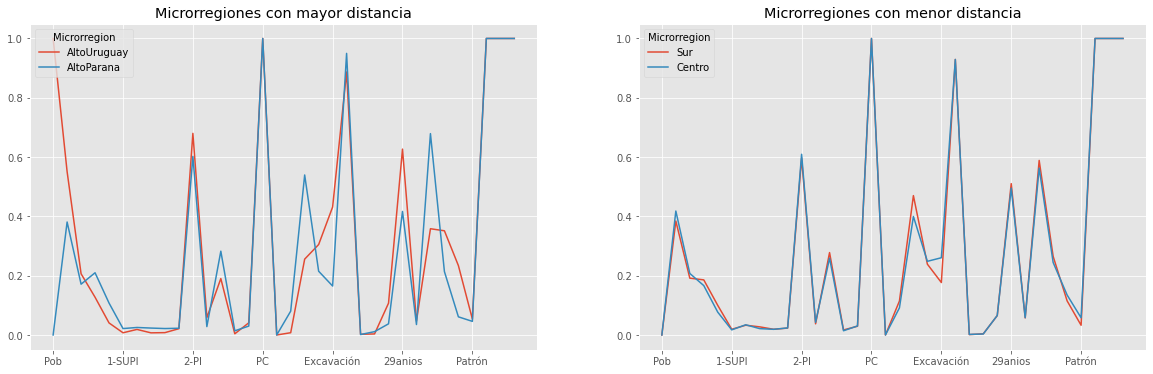

In [30]:
# Microrregiones con mayor y menor distancia
# ==============================================================================
fig, axs = plt.subplots(1,2, figsize=(20, 6))
df.loc[['AltoUruguay', 'AltoParana']].transpose().plot(ax= axs[0])
axs[0].set_title('Microrregiones con mayor distancia')
df.loc[['Sur', 'Centro']].transpose().plot(ax= axs[1])
axs[1].set_title('Microrregiones con menor distancia');

# **K-Means**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [11]:
df2 = pd.read_excel('/content/drive/MyDrive/Ministerio del Agro/Bases/caracterizacion2.xlsx')
df2

,Micro,Microrregion,Pob,1-PI,1-PC,1-SI,1-SC,1-SUPI,1-SUPC,1-UI,1-UC,2-I,2-PI,2-PC,2-SI,2-SC,Analf,PC,CEL,Cloaca,Camara/Pozo,Pozo Ciego,Excavación,Red Eléctrica,Generador,Otro,Sin Luz,29anios,65anios,Obrero,Cuentapropista,TrabFliar,Patrón,CaracterOcup,SectorTrabajo,SectorPublico
0,AltoParana,0,0,0.3810,0.1713,0.2098,0.1077,0.0216,0.0253,0.0233,0.0217,0.0227,0.6024,0.0282,0.2826,0.0140,0.0300,1,0,0.0804,0.5396,0.2150,0.1651,0.9497,0.0015,0.0112,0.0376,0.4166,0.0352,0.6791,0.2138,0.0612,0.0459,1,1,1
1,AltoUruguay,1,1,0.5509,0.2064,0.1273,0.0406,0.0074,0.0187,0.0072,0.0079,0.0212,0.6800,0.0585,0.1902,0.0040,0.0410,1,0,0.0076,0.2558,0.3050,0.4316,0.8871,0.0023,0.0035,0.1072,0.6268,0.0470,0.3583,0.3514,0.2340,0.0538,1,1,1
2,Centro,2,0,0.4180,0.2075,0.1665,0.0769,0.0172,0.0344,0.0214,0.0191,0.0238,0.6094,0.0426,0.2592,0.0142,0.0305,1,0,0.0914,0.3997,0.2484,0.2605,0.9291,0.0019,0.0033,0.0657,0.4952,0.0585,0.5628,0.2445,0.1348,0.0580,1,1,1
3,Nordeste,3,1,0.5548,0.1712,0.1390,0.0477,0.0097,0.0192,0.0088,0.0074,0.0264,0.6825,0.0443,0.1911,0.0097,0.0485,1,0,0.0142,0.2856,0.2918,0.4084,0.8063,0.0035,0.0069,0.1832,0.6621,0.0347,0.4178,0.3265,0.2192,0.0366,1,1,1
4,Oeste,4,0,0.4049,0.1925,0.1966,0.0872,0.0182,0.0313,0.0165,0.0167,0.0231,0.6014,0.0290,0.2855,0.0138,0.0311,1,0,0.1054,0.4844,0.2065,0.2038,0.7196,0.0025,0.0055,0.0576,0.5929,0.0683,0.6547,0.2136,0.0673,0.0644,1,1,1
5,Sur,5,0,0.3843,0.1916,0.1858,0.0998,0.0192,0.0329,0.0274,0.0192,0.0232,0.5960,0.0376,0.2779,0.0169,0.0295,1,0,0.1144,0.4700,0.2388,0.1769,0.9293,0.0013,0.0039,0.0654,0.5104,0.0575,0.5887,0.2651,0.1150,0.0328,1,1,1


In [12]:
X = np.array(df2.iloc[:, 2:36])
y = np.array(df2['Micro'])
X.shape

(6, 34)

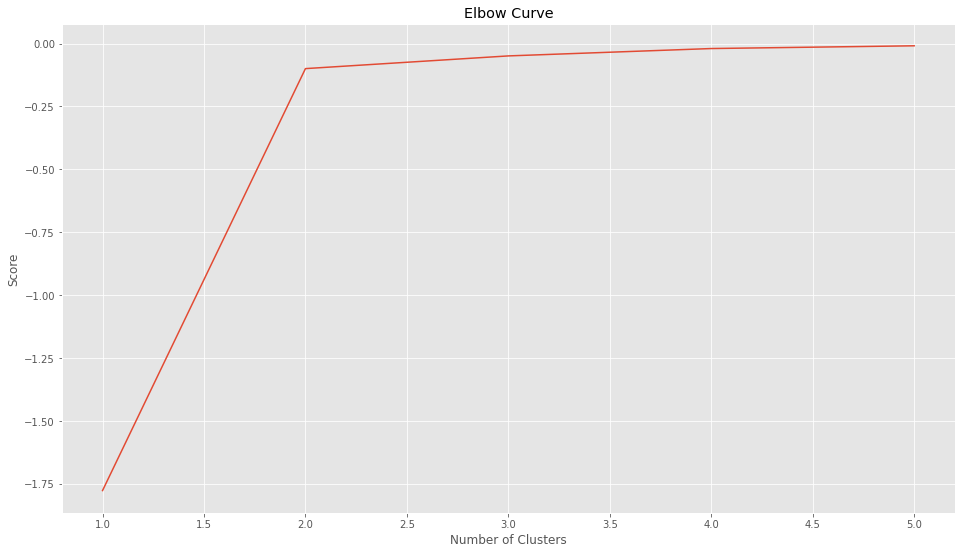

In [13]:
Nc = range(1, 6)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.       0.39705  0.190725 0.189675 0.0929   0.01905  0.030975 0.02215
  0.019175 0.0232   0.6023   0.03435  0.2763   0.014725 0.030275 1.
  0.       0.0979   0.473425 0.227175 0.201575 0.881925 0.0018   0.005975
  0.056575 0.503775 0.054875 0.621325 0.23425  0.094575 0.050275 1.
  1.       1.      ]
 [1.       0.55285  0.1888   0.13315  0.04415  0.00855  0.01895  0.008
  0.00765  0.0238   0.68125  0.0514   0.19065  0.00685  0.04475  1.
  0.       0.0109   0.2707   0.2984   0.42     0.8467   0.0029   0.0052
  0.1452   0.64445  0.04085  0.38805  0.33895  0.2266   0.0452   1.
  1.       1.      ]]


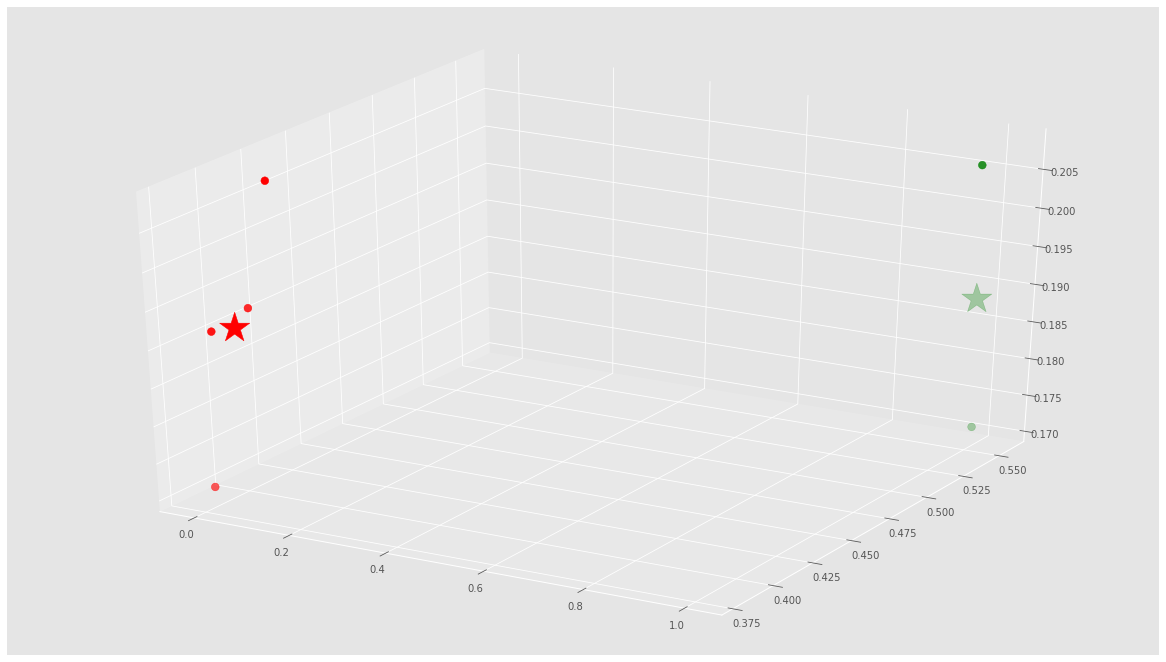

In [15]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [16]:
kmeans.predict(X)

array([0, 1, 0, 1, 0, 0], dtype=int32)

In [17]:
copy =  pd.DataFrame()
copy['Micro']=df2['Micro'].values
copy['Microrregion']=df2['Microrregion'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,4
1,green,2


# **K-Means 2**

Importación de paquetes y lectura de datos

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
data = pd.read_excel('/content/drive/MyDrive/Ministerio del Agro/Bases/caracterizacion2.xlsx')

In [21]:
micro = data['Micro']
micro

0     AltoParana
1    AltoUruguay
2         Centro
3       Nordeste
4          Oeste
5            Sur
Name: Micro, dtype: object

Escalamiento de datos

In [22]:
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(data.iloc[:, 3:36])

In [23]:
#Se determina las variables a evaluar
X = data_escalada.copy()

Hallamos valor óptimo de K con el método elbow

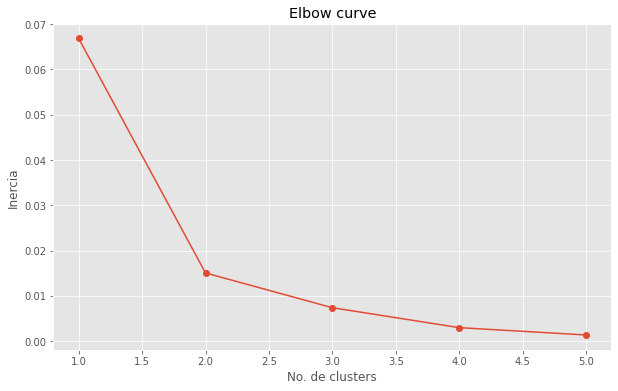

In [25]:
inercia = [] 
for i in range(1, 6):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
#Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Elbow curve')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 6)), inercia, marker='o')
plt.show()

Aplicamos el algoritmo de clustering y lo entrenamos

In [26]:
algoritmo = KMeans(n_clusters = 3, init = 'k-means++', 
                   max_iter = 300, n_init = 10)
algoritmo.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Obtenemos datos de centroides y etiquetas. Luego verificamos en que cluster se encuentra cada observacion

In [27]:
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_
data_prediccion = algoritmo.predict(data_escalada)
for i, pred in enumerate(data_prediccion):
    print("Microrregion", i, "se encuentra en el clúster:", pred)

Microrregion 0 se encuentra en el clúster: 1
Microrregion 1 se encuentra en el clúster: 0
Microrregion 2 se encuentra en el clúster: 1
Microrregion 3 se encuentra en el clúster: 0
Microrregion 4 se encuentra en el clúster: 2
Microrregion 5 se encuentra en el clúster: 1


Graficamos los datos

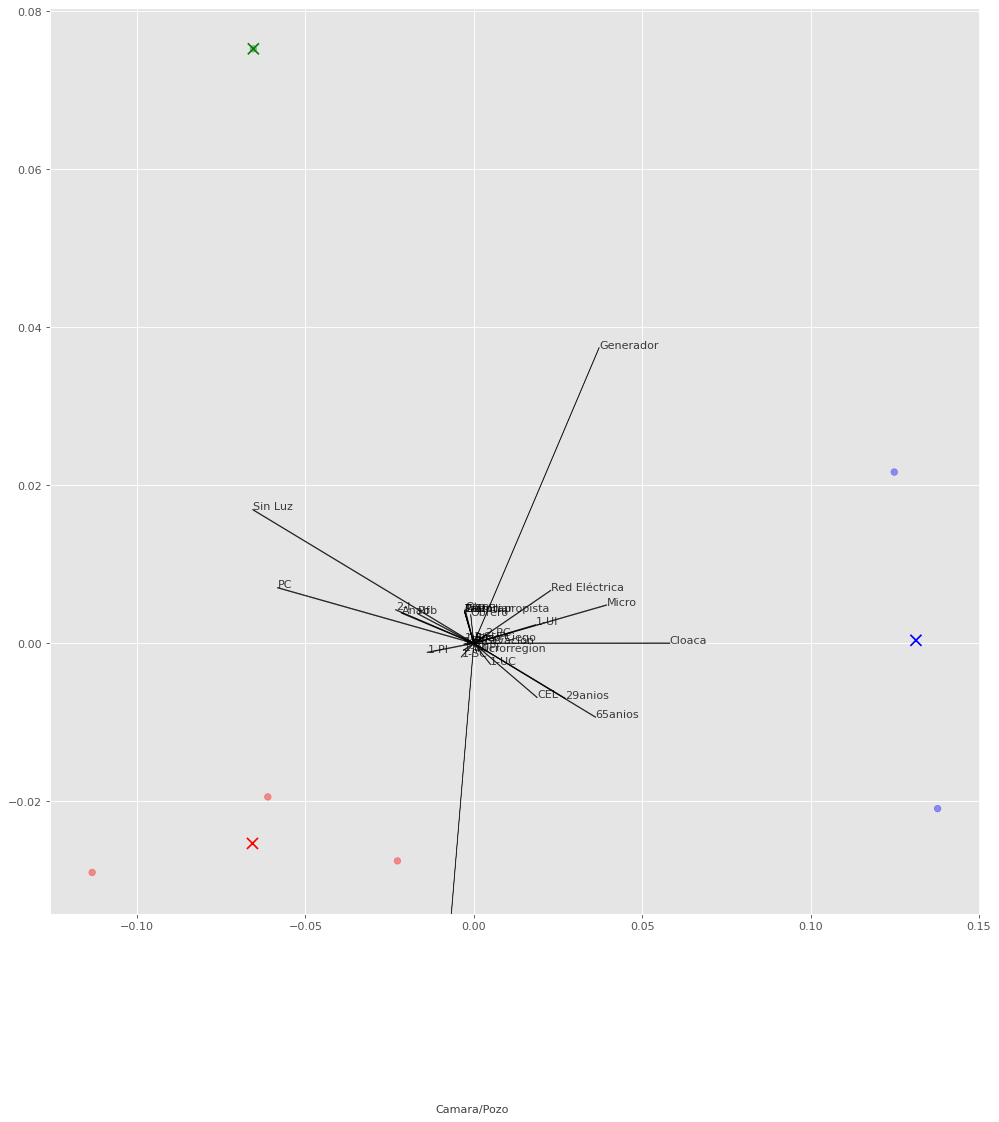

In [28]:
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se define los colores de cada clúster
colores = ['blue', 'red','green']
#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

plt.figure(figsize=(15, 15), dpi=80)
#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns
#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    try:
      plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
                width = 0.0001, head_width = 0.0001, alpha = 0.75)
      #Se colocan los nombres
      plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
              alpha=0.75)
    except:
      pass
plt.show()